In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('dataset/csv/nations.csv')
df.head()

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,2007,NaN,NaN,82683.0,10.1,1.5,Europe & Central Asia,High income
1,AD,AND,Andorra,2011,NaN,NaN,83751.0,NaN,1.3,Europe & Central Asia,High income
2,AD,AND,Andorra,2013,NaN,NaN,80788.0,NaN,1.2,Europe & Central Asia,High income
3,AD,AND,Andorra,2008,NaN,NaN,83861.0,10.4,1.4,Europe & Central Asia,High income
4,AD,AND,Andorra,1992,NaN,NaN,58888.0,12.1,3.6,Europe & Central Asia,High income


In [3]:
df.shape

(5697, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 11 columns):
iso2c                 5670 non-null object
iso3c                 5697 non-null object
country               5697 non-null object
year                  5697 non-null int64
gdp_percap            4918 non-null float64
life_expect           5268 non-null float64
population            5681 non-null float64
birth_rate            5385 non-null float64
neonat_mortal_rate    5130 non-null float64
region                5697 non-null object
income                5697 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 489.7+ KB


In [5]:
for i in df.columns:
    a=df[df[i]=='?'].shape[0]
    if a>0:
        print(i, '\t: ', a)
    else:
        print(i, '\t: No Missing Value')

iso2c 	: No Missing Value
iso3c 	: No Missing Value
country 	: No Missing Value
year 	: No Missing Value
gdp_percap 	: No Missing Value
life_expect 	: No Missing Value
population 	: No Missing Value
birth_rate 	: No Missing Value
neonat_mortal_rate 	: No Missing Value
region 	: No Missing Value
income 	: No Missing Value


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
df.isnull().sum()

iso2c                  27
iso3c                   0
country                 0
year                    0
gdp_percap            779
life_expect           429
population             16
birth_rate            312
neonat_mortal_rate    567
region                  0
income                  0
dtype: int64

In [7]:
df['iso2c'].replace(np.NaN, 'UY', inplace=True)

In [8]:
for i in df.columns:
    a = df[df[i].isnull()].shape[0]
    if a>0:
        df.fillna(df[df[i].notnull()].mean(), inplace=True)

In [9]:
df.isnull().sum()

iso2c                 0
iso3c                 0
country               0
year                  0
gdp_percap            0
life_expect           0
population            0
birth_rate            0
neonat_mortal_rate    0
region                0
income                0
dtype: int64

## Analyzing Individual Feature Patterns using Visualization

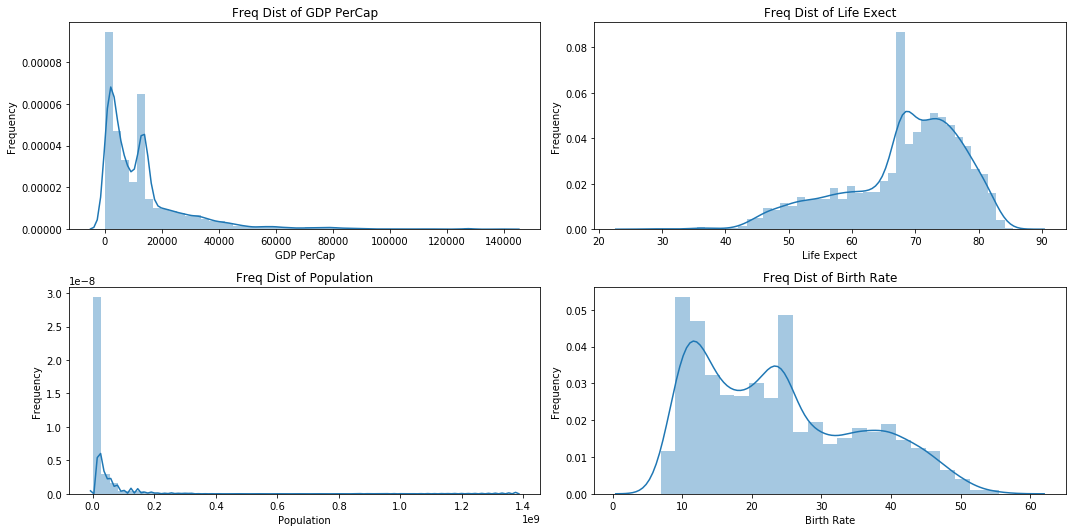

In [10]:
f, axes = plt.subplots(2,2,figsize=[15,7.5])
sns.distplot(df['gdp_percap'], ax=axes[0,0]).set(xlabel='GDP PerCap', ylabel='Frequency', title='Freq Dist of GDP PerCap')
sns.distplot(df['life_expect'], ax=axes[0,1]).set(xlabel='Life Expect', ylabel='Frequency', title='Freq Dist of Life Exect')
sns.distplot(df['population'], ax=axes[1,0]).set(xlabel='Population', ylabel='Frequency', title='Freq Dist of Population')
sns.distplot(df['birth_rate'], ax=axes[1,1]).set(xlabel='Birth Rate', ylabel='Frequency', title='Freq Dist of Birth Rate')
plt.tight_layout()

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Neonat Mortal Rate'),
 Text(0.5, 1.0, 'Freq Dist of Neonat Mortal Rate')]

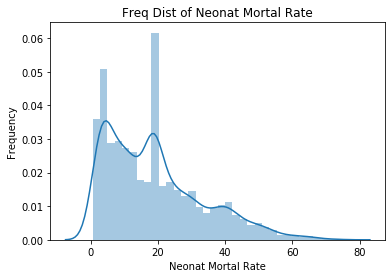

In [11]:
sns.distplot(df['neonat_mortal_rate']).set(xlabel='Neonat Mortal Rate', ylabel='Frequency', title='Freq Dist of Neonat Mortal Rate')

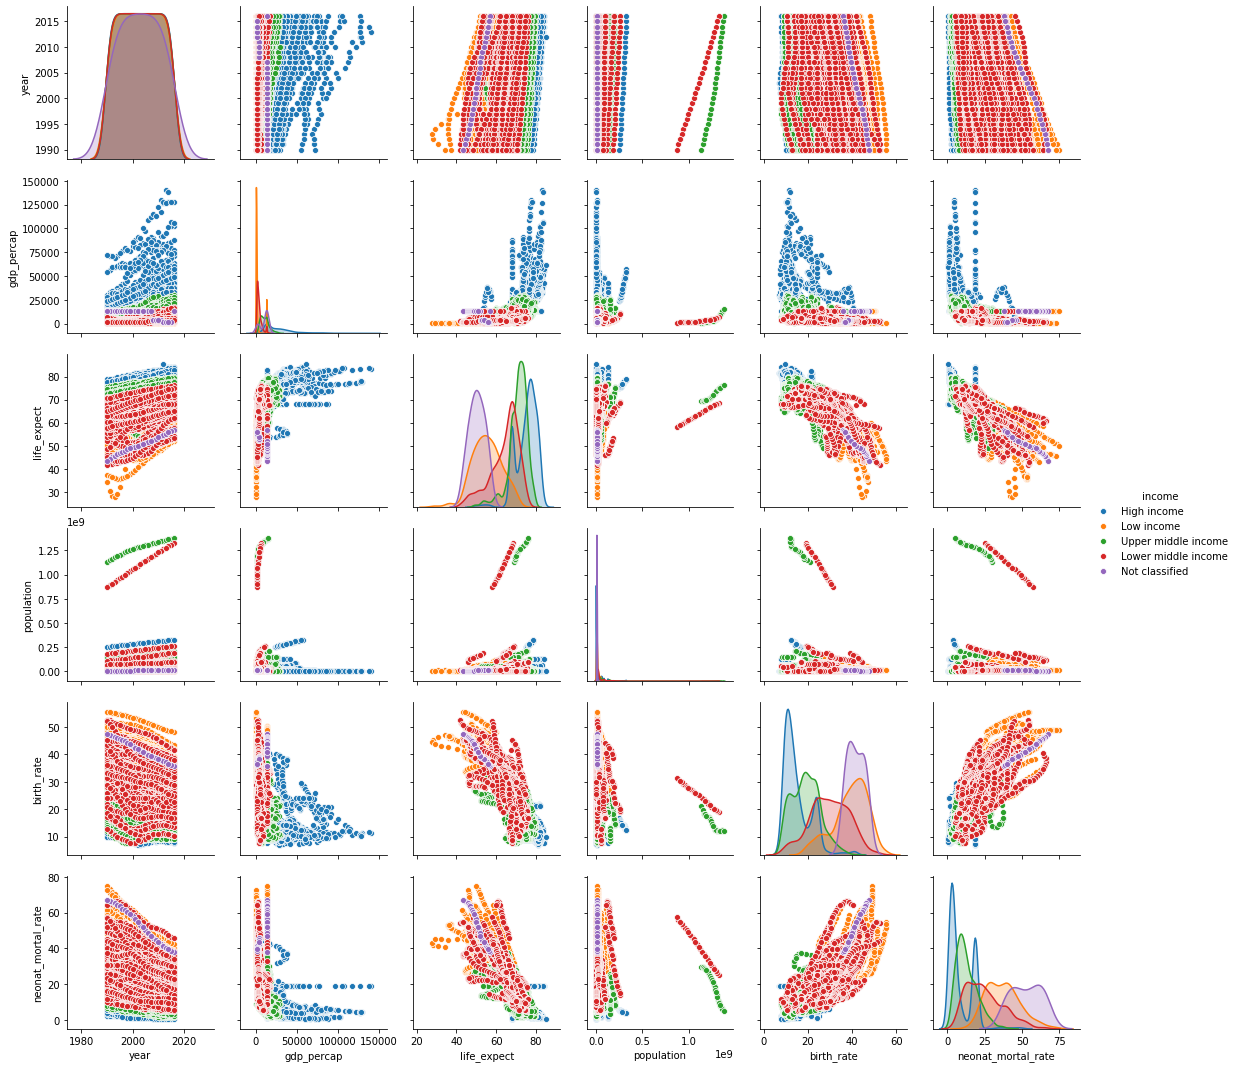

In [12]:
sns.pairplot(df, hue='income')

### Positive Linear Relationship

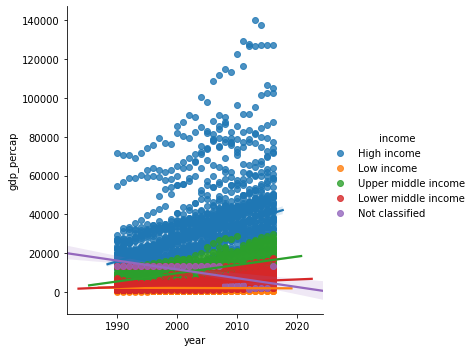

In [13]:
sns.lmplot(x='year', y='gdp_percap', data=df, hue='income')

In [14]:
df[['year', 'gdp_percap']].corr(method='pearson')

,year,gdp_percap
year,1.000000,0.219432
gdp_percap,0.219432,1.000000


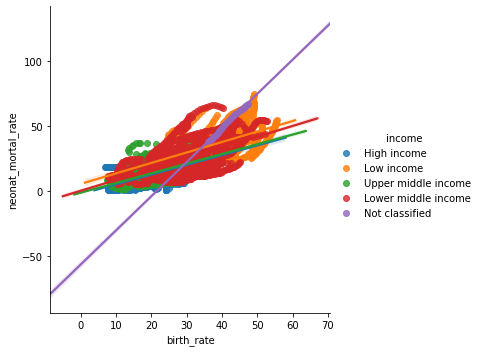

In [15]:
sns.lmplot(x='birth_rate', y='neonat_mortal_rate', data=df, hue='income')

In [16]:
df[['birth_rate', 'neonat_mortal_rate']].corr(method='pearson')

,birth_rate,neonat_mortal_rate
birth_rate,1.000000,0.818898
neonat_mortal_rate,0.818898,1.000000


### Negative Linear Relationship

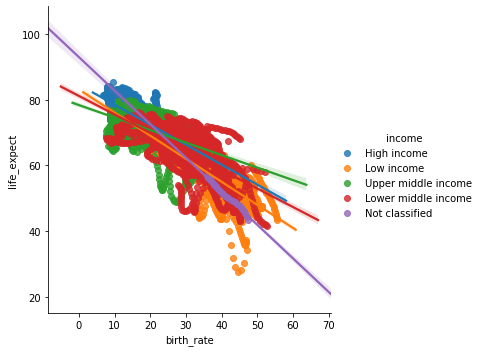

In [17]:
sns.lmplot(x='birth_rate', y='life_expect', data=df, hue='income')

In [18]:
df[['birth_rate', 'life_expect']].corr(method='pearson')

,birth_rate,life_expect
birth_rate,1.000000,-0.859576
life_expect,-0.859576,1.000000


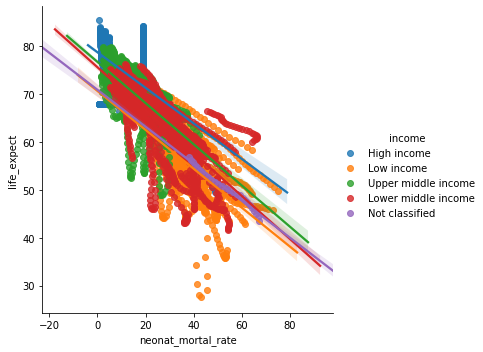

In [19]:
sns.lmplot(x='neonat_mortal_rate', y='life_expect', data=df, hue='income')

In [20]:
df[['neonat_mortal_rate', 'life_expect']].corr(method='pearson')

,neonat_mortal_rate,life_expect
neonat_mortal_rate,1.000000,-0.847264
life_expect,-0.847264,1.000000


### Categorical Variables

In [21]:
df.head(3)

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,2007,13529.52013,67.992766,82683.0,10.10000,1.5,Europe & Central Asia,High income
1,AD,AND,Andorra,2011,13529.52013,67.992766,83751.0,24.13371,1.3,Europe & Central Asia,High income
2,AD,AND,Andorra,2013,13529.52013,67.992766,80788.0,24.13371,1.2,Europe & Central Asia,High income


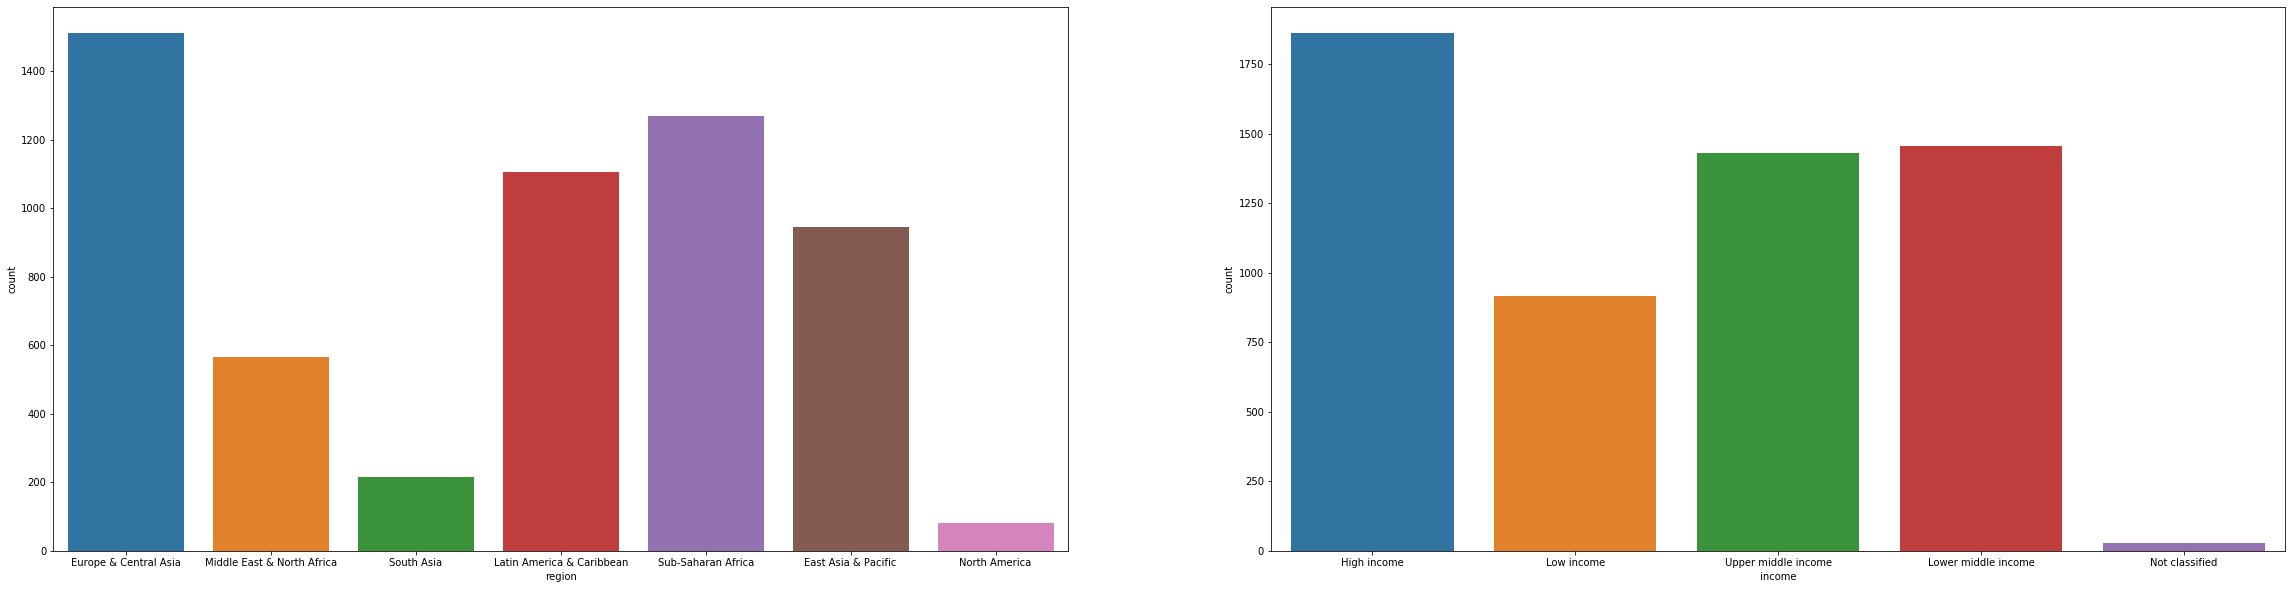

In [22]:
f, axes = plt.subplots(1,2,figsize=[40,10])
sns.countplot(x='region', data=df, ax=axes[0])
sns.countplot(x='income', data=df, ax=axes[1])

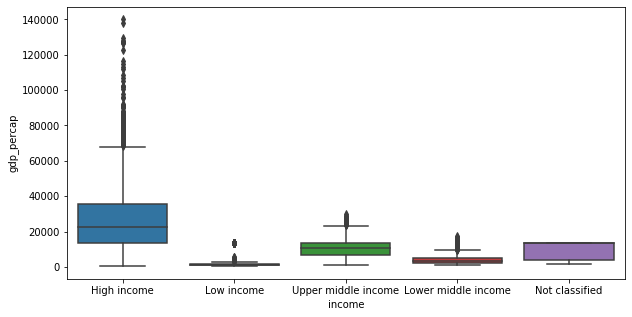

In [23]:
plt.figure(figsize=[10,5])
sns.boxplot(x='income', y='gdp_percap', data=df)

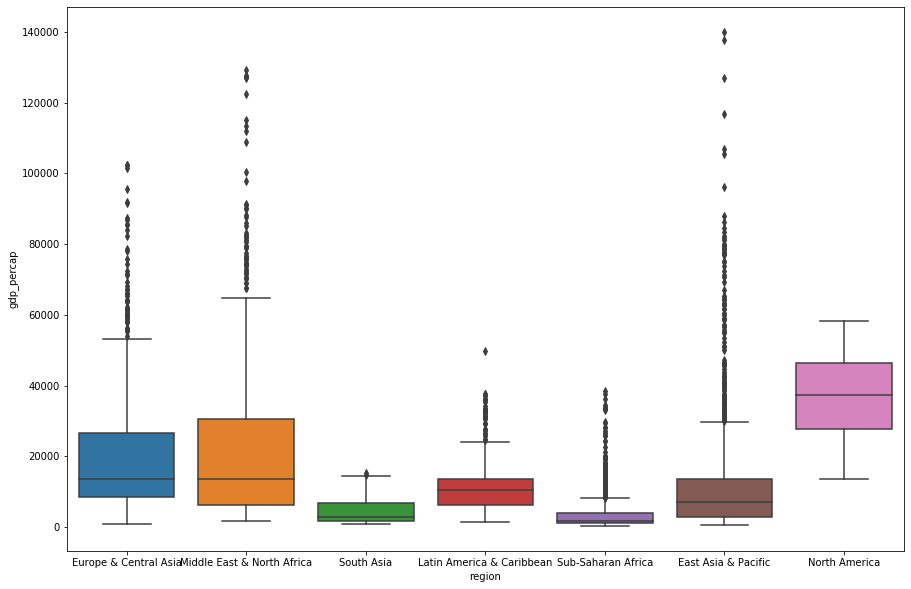

In [24]:
plt.figure(figsize=[15,10])
sns.boxplot(x='region', y='gdp_percap', data=df)

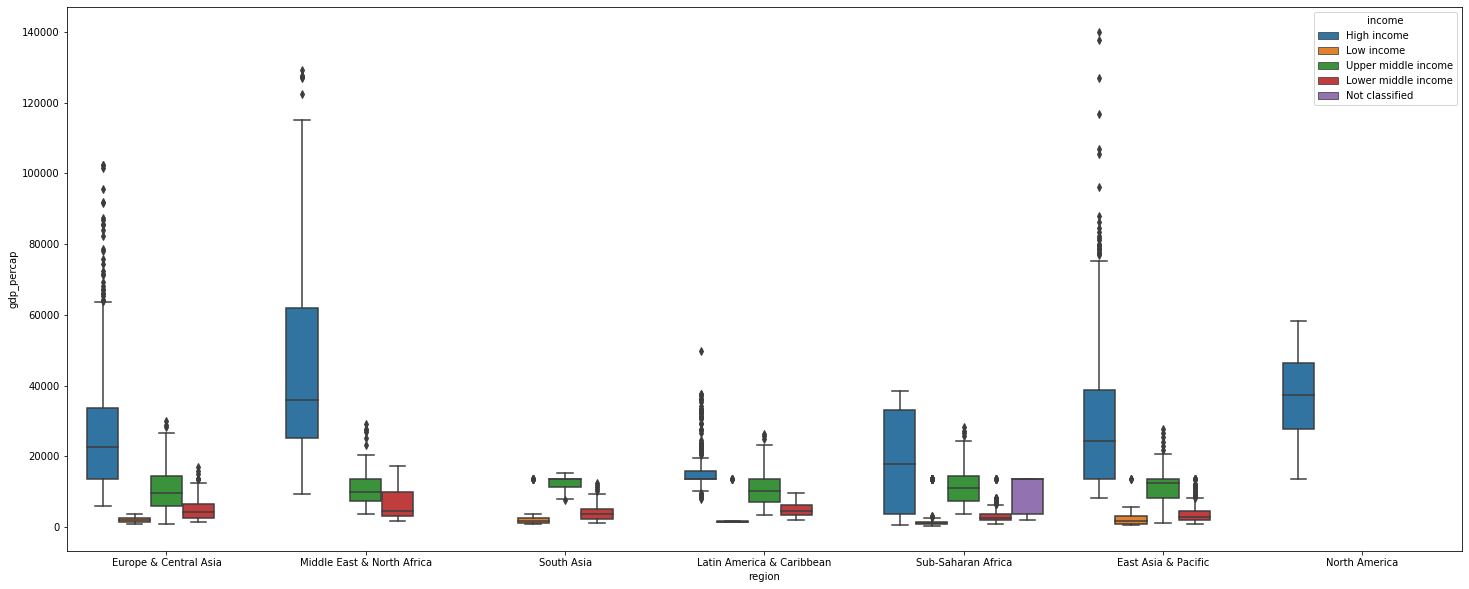

In [25]:
plt.figure(figsize=[25,10])
sns.boxplot(x='region', y='gdp_percap', data=df, hue='income')

## Descriptive Statistical Analysis

In [26]:
pd.set_option('precision', 3)
df.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,5697.00,5697.000,5697.000,5.697e+03,5697.000,5697.000
mean,2003.00,13529.520,68.172,3.002e+07,23.917,18.904
std,7.79,15942.747,9.352,1.203e+08,11.448,14.263
min,1990.00,242.001,27.610,9.003e+03,6.900,0.600
25%,1996.00,2811.870,63.174,7.479e+05,13.608,7.100
50%,2003.00,9163.159,69.810,5.391e+06,22.414,17.600
75%,2010.00,15371.150,75.010,1.829e+07,32.624,26.800
max,2016.00,140037.224,85.417,1.379e+09,55.565,75.000


In [27]:
df.head(3)

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,2007,13529.52,67.993,82683.0,10.100,1.5,Europe & Central Asia,High income
1,AD,AND,Andorra,2011,13529.52,67.993,83751.0,24.134,1.3,Europe & Central Asia,High income
2,AD,AND,Andorra,2013,13529.52,67.993,80788.0,24.134,1.2,Europe & Central Asia,High income


In [28]:
df['region'].value_counts()

Europe & Central Asia         1512
Sub-Saharan Africa            1269
Latin America & Caribbean     1107
East Asia & Pacific            945
Middle East & North Africa     567
South Asia                     216
North America                   81
Name: region, dtype: int64

In [29]:
df['income'].value_counts()

High income            1863
Lower middle income    1458
Upper middle income    1431
Low income              918
Not classified           27
Name: income, dtype: int64

In [30]:
# high income
df_hi = df[df['income']=='High income']

# Upper middle income
df_umi = df[df['income']=='Upper middle income']

# Lower middle income
df_lmi = df[df['income']=='Lower middle income']

# Low income
df_li = df[df['income']=='Low income']

# Not Classified
df_nc = df[df['income']=='Not classified']

In [31]:
# high income
df_hi.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,1863.000,1863.000,1863.000,1.863e+03,1863.000,1863.000
mean,2003.000,28324.419,75.361,1.545e+07,15.183,9.104
std,7.791,19747.380,5.295,4.004e+07,6.142,8.102
min,1990.000,640.032,48.239,1.155e+04,6.900,0.600
25%,1996.000,13529.520,72.370,1.597e+05,10.625,2.900
50%,2003.000,22659.485,76.537,2.252e+06,13.000,4.700
75%,2010.000,35344.604,79.163,1.017e+07,18.452,18.771
max,2016.000,140037.224,85.417,3.231e+08,42.140,50.900


In [32]:
# Upper middle income
df_umi.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,1431.000,1431.000,1431.000,1.431e+03,1431.000,1431.000
mean,2003.000,11036.289,71.113,4.389e+07,19.128,13.038
std,7.792,5178.973,4.884,1.750e+08,6.328,7.048
min,1990.000,949.282,48.838,1.509e+04,7.600,1.500
25%,1996.000,6895.481,68.782,1.257e+06,14.030,7.900
50%,2003.000,10421.036,71.903,5.103e+06,19.016,11.400
75%,2010.000,13529.520,74.326,2.315e+07,23.728,17.350
max,2016.000,29862.319,79.831,1.379e+09,41.063,42.200


In [33]:
# Lower middle income
df_lmi.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,1458.000,1458.000,1458.000,1.458e+03,1458.000,1458.000
mean,2003.000,4317.625,64.397,4.177e+07,29.759,25.007
std,7.792,3004.665,7.237,1.530e+08,8.746,12.358
min,1990.000,891.552,41.696,9.003e+03,7.700,5.300
25%,1996.000,2228.041,60.417,8.353e+05,23.963,14.700
50%,2003.000,3398.588,66.424,5.440e+06,29.676,23.000
75%,2010.000,5248.897,69.435,2.084e+07,36.395,32.575
max,2016.000,17348.937,76.253,1.324e+09,52.749,66.300


In [34]:
# Low income
df_li.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,918.000,918.000,918.000,9.180e+02,918.000,918.000
mean,2003.000,2115.344,55.514,1.998e+07,39.309,37.245
std,7.793,3168.834,7.393,2.659e+07,7.851,11.336
min,1990.000,242.001,27.610,4.116e+05,17.794,11.600
25%,1996.000,808.761,50.377,5.841e+06,35.149,28.400
50%,2003.000,1198.590,55.292,1.066e+07,40.462,36.500
75%,2010.000,1700.875,60.405,2.285e+07,45.210,44.375
max,2016.000,13529.520,72.489,1.630e+08,55.565,75.000


In [35]:
# Not Classified
df_nc.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,27.000,27.000,27.000,2.700e+01,27.000,27.000
mean,2003.000,10347.028,50.426,8.003e+06,41.678,52.989
std,7.937,5018.289,3.835,2.277e+06,3.726,9.816
min,1990.000,1846.742,43.525,5.432e+06,35.936,37.900
25%,1996.500,3666.634,47.663,5.791e+06,38.546,44.100
50%,2003.000,13529.520,50.393,7.502e+06,41.364,53.200
75%,2009.500,13529.520,53.384,9.869e+06,45.053,61.850
max,2016.000,13529.520,56.811,1.223e+07,47.446,67.200


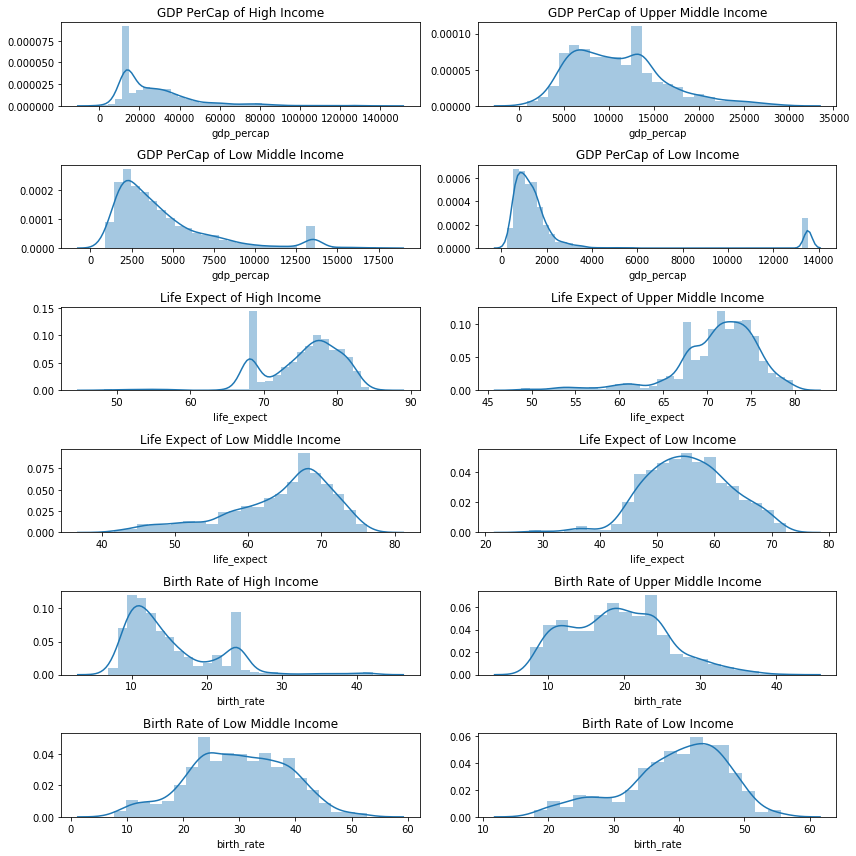

In [36]:
f, axes = plt.subplots(6,2,figsize=[12,12])
sns.distplot(df_hi['gdp_percap'], ax=axes[0,0]).set(title='GDP PerCap of High Income')
sns.distplot(df_umi['gdp_percap'], ax=axes[0,1]).set(title='GDP PerCap of Upper Middle Income')
sns.distplot(df_lmi['gdp_percap'], ax=axes[1,0]).set(title='GDP PerCap of Low Middle Income')
sns.distplot(df_li['gdp_percap'], ax=axes[1,1]).set(title='GDP PerCap of Low Income')

sns.distplot(df_hi['life_expect'], ax=axes[2,0]).set(title='Life Expect of High Income')
sns.distplot(df_umi['life_expect'], ax=axes[2,1]).set(title='Life Expect of Upper Middle Income')
sns.distplot(df_lmi['life_expect'], ax=axes[3,0]).set(title='Life Expect of Low Middle Income')
sns.distplot(df_li['life_expect'], ax=axes[3,1]).set(title='Life Expect of Low Income')

sns.distplot(df_hi['birth_rate'], ax=axes[4,0]).set(title='Birth Rate of High Income')
sns.distplot(df_umi['birth_rate'], ax=axes[4,1]).set(title='Birth Rate of Upper Middle Income')
sns.distplot(df_lmi['birth_rate'], ax=axes[5,0]).set(title='Birth Rate of Low Middle Income')
sns.distplot(df_li['birth_rate'], ax=axes[5,1]).set(title='Birth Rate of Low Income')

plt.tight_layout()

## Grouping and Matrix Plot

In [37]:
df_top5_pop = df.groupby('country').sum().sort_values(['population'], ascending=False).drop('year', axis=1).head()
df_top5_pop

,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
country,,,,,
China,1.567e+05,1969.051,3.446e+10,386.030,462.2
India,8.018e+04,1718.511,2.981e+10,674.719,1109.6
United States,1.085e+06,2083.893,7.803e+09,379.500,123.5
Indonesia,1.702e+05,1799.772,5.969e+09,590.138,566.8
Brazil,2.944e+05,1915.246,4.882e+09,509.232,417.6


(0, 5)

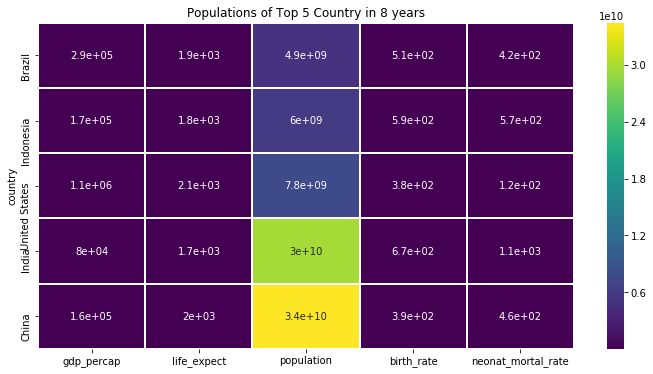

In [38]:
plt.figure(figsize=[12,6])
sns.heatmap(df_top5_pop, cmap='viridis', lw=1, annot=True).set(title='Populations of Top 5 Country in 8 years')
plt.xlim(0,5)
plt.ylim(0,5)

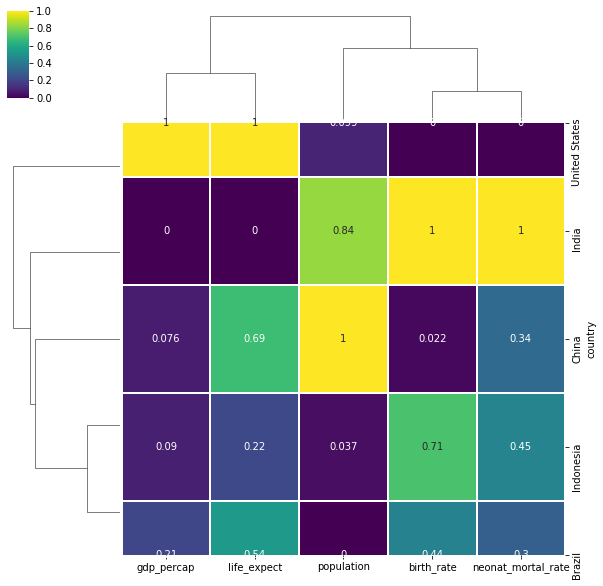

In [39]:
sns.clustermap(df_top5_pop, cmap='viridis', standard_scale=1, lw=1, annot=True)

In [40]:
df_top5_gdp = df.groupby('country').sum().sort_values(['gdp_percap'], ascending=False).drop('year', axis=1).head()
df_top5_gdp

,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
country,,,,,
Qatar,2.026e+06,2067.328,3.002e+07,440.003,174.200
United Arab Emirates,1.962e+06,2018.214,1.346e+08,427.168,151.500
Brunei Darussalam,1.901e+06,2038.906,9.377e+06,561.855,136.200
Luxembourg,1.753e+06,2124.445,1.250e+07,327.300,63.700
"Macao SAR, China",1.700e+06,2184.931,1.261e+07,296.829,506.809


(0, 5)

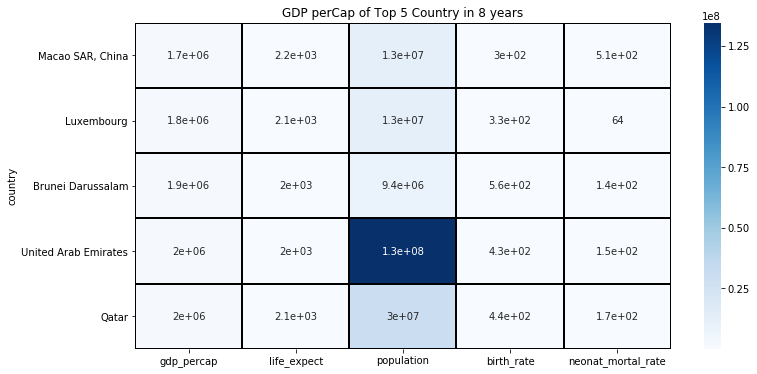

In [41]:
plt.figure(figsize=[12,6])
sns.heatmap(df_top5_gdp, cmap='Blues', lw=1, linecolor='black', annot=True).set(title='GDP perCap of Top 5 Country in 8 years')
plt.xlim(0,5)
plt.ylim(0,5)

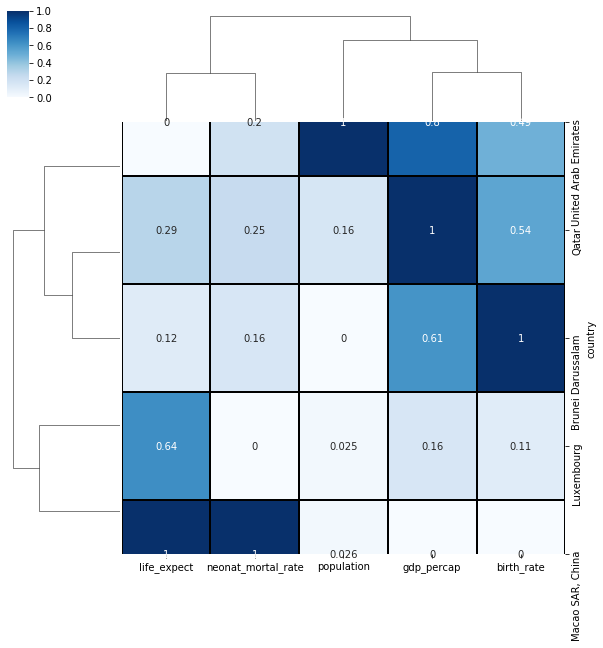

In [42]:
sns.clustermap(df_top5_gdp, cmap='Blues', standard_scale=1, lw=1, linecolor='black', annot=True)

In [43]:
df_top5_br = df.groupby('country').sum().sort_values(['birth_rate'], ascending=False).drop('year', axis=1).head()
df_top5_br

,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
country,,,,,
Niger,18940.006,1402.461,3.578e+08,1411.094,1064.9
Chad,35095.832,1317.573,2.603e+08,1320.513,1152.9
Angola,106814.536,1376.303,5.159e+08,1291.783,1220.5
Mali,38531.765,1377.198,3.373e+08,1281.735,1412.3
Uganda,29182.327,1378.995,7.480e+08,1278.425,824.1


(0, 5)

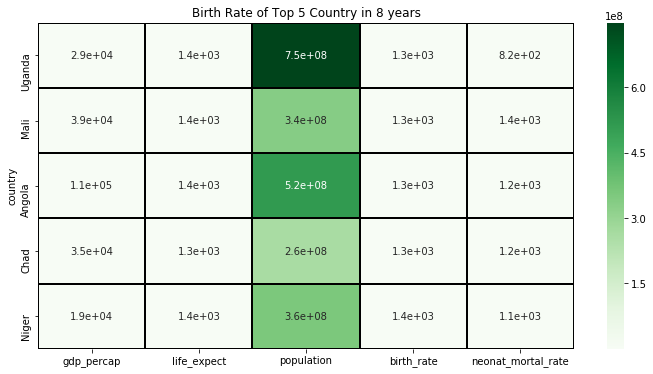

In [44]:
plt.figure(figsize=[12,6])
sns.heatmap(df_top5_br, cmap='Greens', lw=1, linecolor='black', annot=True).set(title='Birth Rate of Top 5 Country in 8 years')
plt.xlim(0,5)
plt.ylim(0,5)

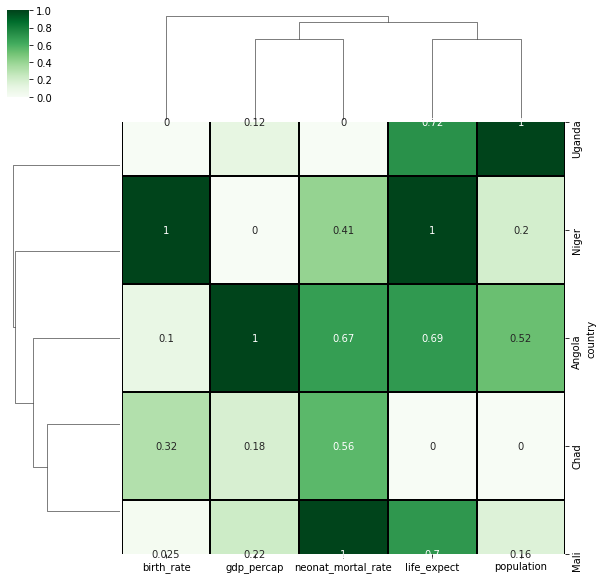

In [45]:
sns.clustermap(df_top5_br, cmap='Greens', standard_scale=1, lw=1, linecolor='black', annot=True)

In [46]:
df_top5_le = df.groupby('country').sum().sort_values(['life_expect'], ascending=False).drop('year', axis=1).head()
df_top5_le

,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
country,,,,,
Japan,8.073e+05,2200.654,3.421e+09,242.627,43.500
"Hong Kong SAR, China",9.504e+05,2193.071,1.799e+08,266.100,506.809
"Macao SAR, China",1.700e+06,2184.931,1.261e+07,296.829,506.809
Iceland,9.125e+05,2174.886,7.921e+06,407.600,52.400
Switzerland,1.144e+06,2174.101,2.007e+08,291.200,90.000


(0, 5)

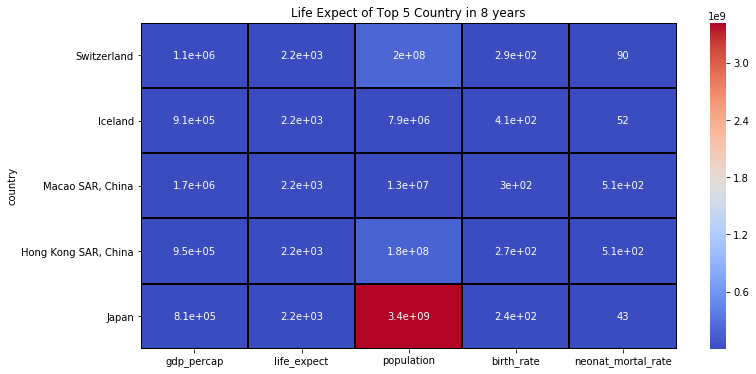

In [47]:
plt.figure(figsize=[12,6])
sns.heatmap(df_top5_le, cmap='coolwarm', lw=1, linecolor='black', annot=True).set(title='Life Expect of Top 5 Country in 8 years')
plt.xlim(0,5)
plt.ylim(0,5)

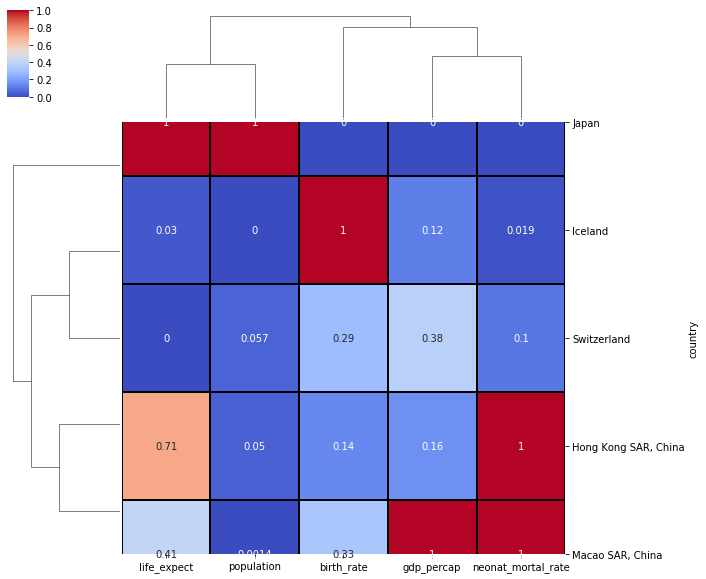

In [48]:
sns.clustermap(df_top5_le, cmap='coolwarm', standard_scale=1, lw=1, linecolor='black', annot=True)

## Correlation

In [49]:
cor = df.corr(method='pearson')
cor

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
year,1.000,0.219,0.231,0.025,-0.195,-0.229
gdp_percap,0.219,1.000,0.547,-0.051,-0.499,-0.512
life_expect,0.231,0.547,1.000,0.017,-0.860,-0.847
population,0.025,-0.051,0.017,1.000,-0.056,0.058
birth_rate,-0.195,-0.499,-0.860,-0.056,1.000,0.819
neonat_mortal_rate,-0.229,-0.512,-0.847,0.058,0.819,1.000


(6, 0)

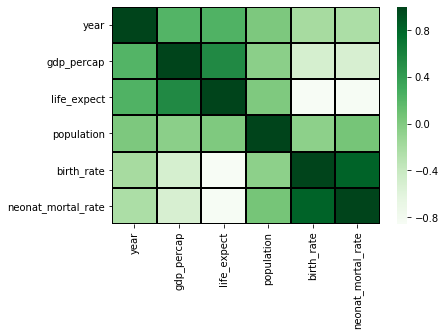

In [50]:
sns.heatmap(cor, cmap='Greens', lw=1, linecolor='black')
plt.xlim(0,6)
plt.ylim(6,0)

## Normalize Data and Feature Extraction

In [51]:
df['income'] = preprocessing.LabelEncoder().fit(df['income']).transform(df['income'])

In [52]:
df.head(3)

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,2007,13529.52,67.993,82683.0,10.100,1.5,Europe & Central Asia,0
1,AD,AND,Andorra,2011,13529.52,67.993,83751.0,24.134,1.3,Europe & Central Asia,0
2,AD,AND,Andorra,2013,13529.52,67.993,80788.0,24.134,1.2,Europe & Central Asia,0


In [53]:
scale = df.copy()
scale.drop(['iso2c', 'iso3c', 'country', 'year', 'region', 'income'], axis=1, inplace=True)
scale.head()

,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
0,13529.52,67.993,82683.0,10.100,1.5
1,13529.52,67.993,83751.0,24.134,1.3
2,13529.52,67.993,80788.0,24.134,1.2
3,13529.52,67.993,83861.0,10.400,1.4
4,13529.52,67.993,58888.0,12.100,3.6


In [54]:
df_scale = preprocessing.StandardScaler().fit(scale).transform(scale)
X = pd.DataFrame(df_scale, columns = scale.columns)
X.head(3)

,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
0,3.423e-16,-0.019,-0.249,-1.207,-1.220
1,3.423e-16,-0.019,-0.249,0.019,-1.234
2,3.423e-16,-0.019,-0.249,0.019,-1.241


### p-value

In [55]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['year'], df['gdp_percap'])
print("The Pearson Correlation Coefficient (year vs gdp_percap) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['birth_rate'], df['neonat_mortal_rate'])
print("The Pearson Correlation Coefficient (birth_rate vs neonat_mortal_rate) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['birth_rate'], df['life_expect'])
print("The Pearson Correlation Coefficient (birth_rate vs life_expect) is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(df['neonat_mortal_rate'], df['life_expect'])
print("The Pearson Correlation Coefficient (neonat_mortal_rate vs life_expect) is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (year vs gdp_percap) is 0.21943221190173365  with a P-value of P = 4.514191850002976e-63
The Pearson Correlation Coefficient (birth_rate vs neonat_mortal_rate) is 0.8188981198741977  with a P-value of P = 0.0
The Pearson Correlation Coefficient (birth_rate vs life_expect) is -0.8595759612932232  with a P-value of P = 0.0
The Pearson Correlation Coefficient (neonat_mortal_rate vs life_expect) is -0.8472636901076737  with a P-value of P = 0.0


## Train Test Split

In [56]:
y = df['income']
y.head(3)

0    0
1    0
2    0
Name: income, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (3987, 5) (3987,)
Test set:  (1710, 5) (1710,)


## Building K Nearest Neighbors Model

In [58]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [59]:
pred_knn = knn.predict(X_test)
pred_knn[0:5]

array([2, 4, 1, 2, 2])

### Evaluation

In [60]:
print('Classification Report: \n', classification_report(y_test, pred_knn))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_knn))
print('\n')
print('Train Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       521
           1       0.95      0.97      0.96       268
           2       0.95      0.96      0.96       454
           3       0.82      1.00      0.90         9
           4       0.97      0.94      0.95       458

    accuracy                           0.96      1710
   macro avg       0.93      0.97      0.95      1710
weighted avg       0.96      0.96      0.96      1710



Confusion Matrix: 
 [[506   0   2   0  13]
 [  0 259   9   0   0]
 [  0  15 436   2   1]
 [  0   0   0   9   0]
 [ 18   0  10   0 430]]


Train Accuracy:  1.0
Test Accuracy:  0.9590643274853801


## Choosing a K value

In [61]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

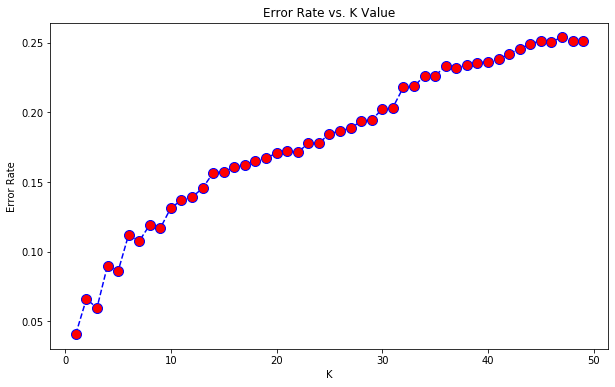

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
Ks = 51
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95906433, 0.93391813, 0.94035088, 0.90994152, 0.91403509,
       0.8877193 , 0.89239766, 0.88070175, 0.88304094, 0.86842105,
       0.86315789, 0.86081871, 0.85438596, 0.84327485, 0.84269006,
       0.83918129, 0.8374269 , 0.83508772, 0.83274854, 0.82923977,
       0.82748538, 0.82865497, 0.82222222, 0.82222222, 0.81520468,
       0.81345029, 0.81111111, 0.80643275, 0.80526316, 0.79766082,
       0.79649123, 0.78187135, 0.78128655, 0.77368421, 0.77368421,
       0.76666667, 0.76783626, 0.76608187, 0.76432749, 0.76374269,
       0.7619883 , 0.75789474, 0.75438596, 0.75087719, 0.74853801,
       0.74912281, 0.74619883, 0.74853801, 0.74853801, 0.74736842])

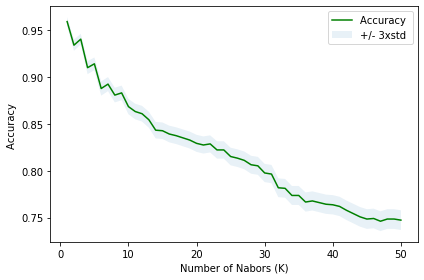

In [64]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

___

## Building Decision Tree Model

In [65]:
dtree = DecisionTreeClassifier().fit(X_train, y_train)
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
pred_dtree = dtree.predict(X_test)
pred_dtree[0:5]

array([2, 4, 1, 2, 2])

### Evaluation

In [67]:
print('Classification Report: \n', classification_report(y_test, pred_dtree))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_dtree))
print('\n')
print('Train Accuracy: ', metrics.accuracy_score(y_train, dtree.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_dtree))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       521
           1       0.96      0.94      0.95       268
           2       0.90      0.92      0.91       454
           3       0.73      0.89      0.80         9
           4       0.92      0.88      0.90       458

    accuracy                           0.93      1710
   macro avg       0.89      0.92      0.90      1710
weighted avg       0.93      0.93      0.93      1710



Confusion Matrix: 
 [[507   0   3   0  11]
 [  1 251  15   1   0]
 [  2  10 417   2  23]
 [  0   0   1   8   0]
 [ 27   0  26   0 405]]


Train Accuracy:  1.0
Test Accuracy:  0.928654970760234


___

## Building Logistic Regression Model

In [68]:
log = LogisticRegression().fit(X_train, y_train)
log

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
pred_log = log.predict(X_test)
pred_log[0:5]

array([2, 4, 1, 2, 2])

### Evaluation

In [70]:
print('Classification Report: \n', classification_report(y_test, pred_log))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_log))
print('\n')
print('Train Accuracy: ', metrics.accuracy_score(y_train, log.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_log))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       521
           1       0.66      0.69      0.68       268
           2       0.63      0.61      0.62       454
           3       0.00      0.00      0.00         9
           4       0.64      0.51      0.57       458

    accuracy                           0.68      1710
   macro avg       0.54      0.54      0.54      1710
weighted avg       0.67      0.68      0.68      1710



Confusion Matrix: 
 [[471   0   0   0  50]
 [  1 186  79   0   2]
 [  4  89 278   0  83]
 [  3   6   0   0   0]
 [137   1  85   0 235]]


Train Accuracy:  0.6761976423375972
Test Accuracy:  0.6842105263157895


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


___

## Building SVM Model

In [71]:
svm = SVC().fit(X_train, y_train)
svm

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
pred_svm = svm.predict(X_test)
pred_svm[0:5]

array([4, 4, 1, 2, 2])

### Evaluation

In [73]:
print('Classification Report: \n', classification_report(y_test, pred_svm))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_svm))
print('\n')
print('Train Accuracy: ', metrics.accuracy_score(y_train, svm.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_svm))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.86       521
           1       0.74      0.74      0.74       268
           2       0.71      0.72      0.72       454
           3       0.00      0.00      0.00         9
           4       0.74      0.64      0.68       458

    accuracy                           0.76      1710
   macro avg       0.60      0.60      0.60      1710
weighted avg       0.75      0.76      0.75      1710



Confusion Matrix: 
 [[477   1   2   0  41]
 [  0 197  70   0   1]
 [  3  60 329   0  62]
 [  0   8   1   0   0]
 [105   0  61   0 292]]


Train Accuracy:  0.7481815901680462
Test Accuracy:  0.7573099415204678


## Gridsearch

In [74]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [77]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.735, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.740, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.732, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.648, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.664, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.665, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.627, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.621, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.622, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.427, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.916, total=   0.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.924, total=   0.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.835, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.826, total=   0.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.846, total=   0.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.737, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.746, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   19.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [78]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [79]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [80]:
grid_predictions = grid.predict(X_test)

In [81]:
print('Classification Report: \n', classification_report(y_test, grid_predictions))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, grid_predictions))
print('\n')
print('Train Accuracy: ', metrics.accuracy_score(y_train, grid.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, grid_predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       521
           1       0.95      0.99      0.97       268
           2       0.97      0.94      0.95       454
           3       0.82      1.00      0.90         9
           4       0.94      0.89      0.91       458

    accuracy                           0.94      1710
   macro avg       0.92      0.96      0.94      1710
weighted avg       0.94      0.94      0.94      1710



Confusion Matrix: 
 [[505   0   1   0  15]
 [  0 264   4   0   0]
 [  4   7 428   2  13]
 [  0   0   0   9   0]
 [ 33   7  10   0 408]]


Train Accuracy:  0.9658891397040381
Test Accuracy:  0.9438596491228071


___

## Building Random Forest Model

In [82]:
rfc = RandomForestClassifier().fit(X_train, y_train)
rfc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
pred_rfc = rfc.predict(X_test)
pred_rfc[0:5]

array([2, 4, 1, 2, 2])

### Evaluation

In [84]:
print('Classification Report: \n', classification_report(y_test, pred_rfc))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred_rfc))
print('\n')
print('Train Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test Accuracy: ', metrics.accuracy_score(y_test, pred_rfc))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       521
           1       0.94      0.96      0.95       268
           2       0.93      0.94      0.94       454
           3       1.00      0.78      0.88         9
           4       0.95      0.92      0.94       458

    accuracy                           0.95      1710
   macro avg       0.96      0.92      0.93      1710
weighted avg       0.95      0.95      0.95      1710



Confusion Matrix: 
 [[511   0   1   0   9]
 [  0 258  10   0   0]
 [  1  15 427   0  11]
 [  0   0   2   7   0]
 [ 17   1  18   0 422]]


Train Accuracy:  0.9972410333584149
Test Accuracy:  0.9502923976608187
